Name : Saarthak Khamakar    
Roll No. : D088   
SAP ID : 60009230057

In [ ]:
from keras.layers import Input, Dense
from keras.models import Model
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
iris = load_iris()
X = iris.data

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

x_train, x_test = train_test_split(X_scaled, test_size=0.2, random_state=42)

In [ ]:
pca = PCA(n_components=3)
pca.fit(x_train)

# Encoded training and test
X_pca_train = pca.transform(x_train)
X_pca_test = pca.transform(x_test)

# PCA reconstruction
X_pca_reconstructed = pca.inverse_transform(X_pca_test)



##LINEAR

In [ ]:
# encoded dimension
encoding_dim = 3
input_dim = 4

# INPUT
input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim)(input_layer)
decoded = Dense(input_dim)(encoded)

linear_autoencoder = Model(input_layer, decoded)
linear_autoencoder.compile(loss='mean_squared_error', optimizer='sgd')

history_linear = linear_autoencoder.fit(
    x_train, x_train,
    epochs=50, batch_size=32, shuffle=True,
    validation_data=(x_test, x_test)
)

encoder_linear = Model(input_layer, encoded)

encoded_input = Input(shape=(encoding_dim,))
decoder_layer = linear_autoencoder.layers[-1]
decoder_linear = Model(encoded_input, decoder_layer(encoded_input))

encoded_linear_test = encoder_linear.predict(x_test)
decoded_linear_test = decoder_linear.predict(encoded_linear_test)


Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 110ms/step - loss: 3.5241 - val_loss: 2.7014
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 2.7171 - val_loss: 2.0158
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - loss: 2.0478 - val_loss: 1.5843
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - loss: 1.7070 - val_loss: 1.2841
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - loss: 1.4483 - val_loss: 1.0730
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - loss: 1.2389 - val_loss: 0.9159
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 132ms/step - loss: 0.9789 - val_loss: 0.7923
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - loss: 0.8554 - val_loss: 0.6937
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 0.8482 - val_loss: 0.6152
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.7898 - val_loss: 0.5505
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - loss: 0.6229 - val_loss: 0.4973
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 0.5656 - val_loss: 0.4525

##SIGMOID


In [ ]:
input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='sigmoid')(input_layer)
decoded = Dense(input_dim, activation='sigmoid')(encoded)

sigmoid_autoencoder = Model(input_layer, decoded)
sigmoid_autoencoder.compile(loss='mean_squared_error', optimizer='sgd')

history_sigmoid = sigmoid_autoencoder.fit(
    x_train, x_train,
    epochs=50, batch_size=32, shuffle=True,
    validation_data=(x_test, x_test)
)

encoder_sigmoid = Model(input_layer, encoded)

encoded_input = Input(shape=(encoding_dim,))
decoder_layer = sigmoid_autoencoder.layers[-1]
decoder_sigmoid = Model(encoded_input, decoder_layer(encoded_input))

encoded_sigmoid_test = encoder_sigmoid.predict(x_test)
decoded_sigmoid_test = decoder_sigmoid.predict(encoded_sigmoid_test)



Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 115ms/step - loss: 1.2269 - val_loss: 1.1722
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 1.2916 - val_loss: 1.1712
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - loss: 1.2860 - val_loss: 1.1702
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - loss: 1.2437 - val_loss: 1.1692
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - loss: 1.2660 - val_loss: 1.1682
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 1.2957 - val_loss: 1.1672
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - loss: 1.3147 - val_loss: 1.1663
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 128ms/step - loss: 1.2779 - val_loss: 1.1653
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - loss: 1.2542 - val_loss: 1.1643
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 1.2894 - val_loss: 1.1633
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - loss: 1.2226 - val_loss: 1.1623
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 108ms/step - loss: 1.2627 - val_loss: 1.16

##RELU

In [ ]:
input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_layer)
decoded = Dense(input_dim, activation='relu')(encoded)

relu_autoencoder = Model(input_layer, decoded)
relu_autoencoder.compile(loss='mean_squared_error', optimizer='sgd')

history_relu = relu_autoencoder.fit(
    x_train, x_train,
    epochs=50, batch_size=32, shuffle=True,
    validation_data=(x_test, x_test)
)

encoder_relu = Model(input_layer, encoded)

encoded_input = Input(shape=(encoding_dim,))
decoder_layer = relu_autoencoder.layers[-1]
decoder_relu = Model(encoded_input, decoder_layer(encoded_input))

encoded_relu_test = encoder_relu.predict(x_test)
decoded_relu_test = decoder_relu.predict(encoded_relu_test)



Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 126ms/step - loss: 2.3948 - val_loss: 2.0136
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 2.4659 - val_loss: 1.8123
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 1.9517 - val_loss: 1.6566
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 1.7306 - val_loss: 1.5366
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 1.6351 - val_loss: 1.4439
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 1.5711 - val_loss: 1.3676
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 1.4891 - val_loss: 1.3063
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 1.4219 - val_loss: 1.2558
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 1.3611 - val_loss: 1.2141
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 1.2423 - val_loss: 1.1779
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 1.2260 - val_loss: 1.1469
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 1.2433 - val_loss: 1.1211


In [ ]:
print("Original datapoints (test set):")
print(x_test)

print("\nReconstructed datapoints (Linear Autoencoder):")
print(decoded_linear_test)



Original datapoints (test set):
[[ 3.10997534e-01 -5.92373012e-01  5.35408562e-01  8.77547895e-04]
 [-1.73673948e-01  1.70959465e+00 -1.16971425e+00 -1.18381211e+00]
 [ 2.24968346e+00 -1.05276654e+00  1.78583195e+00  1.44883158e+00]
 [ 1.89829664e-01 -3.62176246e-01  4.21733708e-01  3.95774101e-01]
 [ 1.15917263e+00 -5.92373012e-01  5.92245988e-01  2.64141916e-01]
 [-5.37177559e-01  7.88807586e-01 -1.28338910e+00 -1.05217993e+00]
 [-2.94841818e-01 -3.62176246e-01 -8.98031345e-02  1.32509732e-01]
 [ 1.28034050e+00  9.82172869e-02  7.62758269e-01  1.44883158e+00]
 [ 4.32165405e-01 -1.97355361e+00  4.21733708e-01  3.95774101e-01]
 [-5.25060772e-02 -8.22569778e-01  8.07091462e-02  8.77547895e-04]
 [ 7.95669016e-01  3.28414053e-01  7.62758269e-01  1.05393502e+00]
 [-1.26418478e+00 -1.31979479e-01 -1.34022653e+00 -1.44707648e+00]
 [-4.16009689e-01  1.01900435e+00 -1.39706395e+00 -1.31544430e+00]
 [-1.14301691e+00  9.82172869e-02 -1.28338910e+00 -1.44707648e+00]
 [-9.00681170e-01  1.70959465e

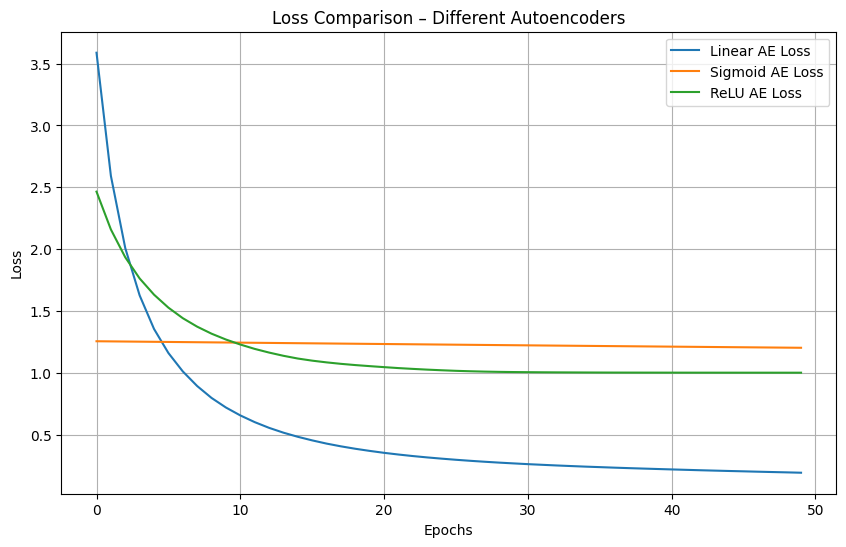

In [ ]:
plt.figure(figsize=(10,6))

plt.plot(history_linear.history['loss'], label='Linear AE Loss')
plt.plot(history_sigmoid.history['loss'], label='Sigmoid AE Loss')
plt.plot(history_relu.history['loss'], label='ReLU AE Loss')

plt.title("Loss Comparison – Different Autoencoders")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()


Colab Link : https://colab.research.google.com/drive/1lzHtaxxx7H4t4nMAVWQVLvoGSDFZutCE?usp=sharing